In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy
import seaborn as sns
import numpy as np

In [ ]:
pip install joypy

In [ ]:
df = pd.read_csv('ev_database_cleaned(1).csv')

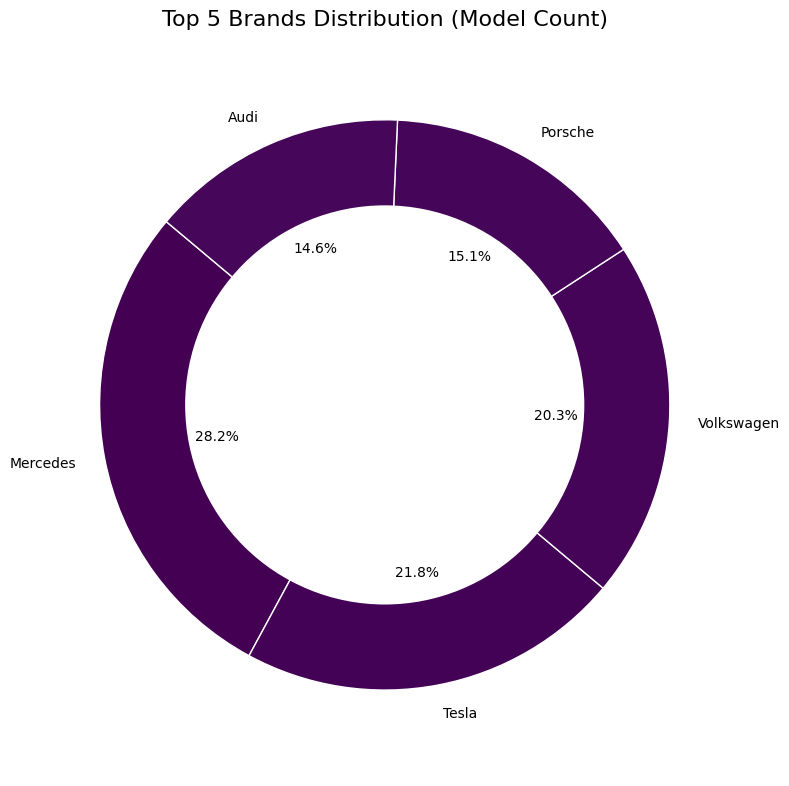

In [ ]:
top_5_counts = df['Brand'].value_counts().head(5)
labels = top_5_counts.index
sizes = top_5_counts.values
colors = plt.get_cmap('viridis').colors
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'width': 0.4, 'edgecolor': 'w'})
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top 5 Brands Distribution (Model Count)', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.savefig('top_5_brands_donut.png')
plt.show()

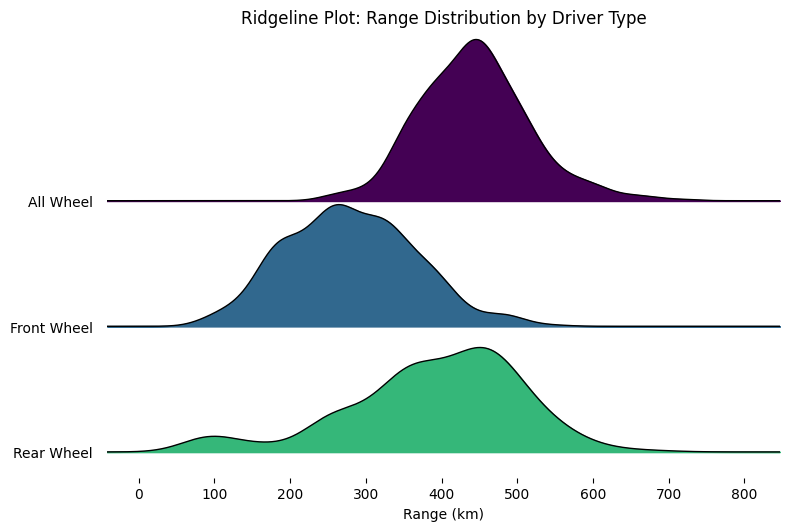

In [ ]:
df['Range'] = pd.to_numeric(df['Range'], errors='coerce')
df = df.dropna(subset=['Range', 'driver_type'])
df = df.sort_values("driver_type")
fig, axes = joypy.joyplot(
    data=df,
    by="driver_type",
    column="Range",
    colormap=plt.cm.viridis,
    figsize=(8,5),
    linewidth=1,
    legend=False
)
plt.title("Ridgeline Plot: Range Distribution by Driver Type")
plt.xlabel("Range (km)")
plt.show()

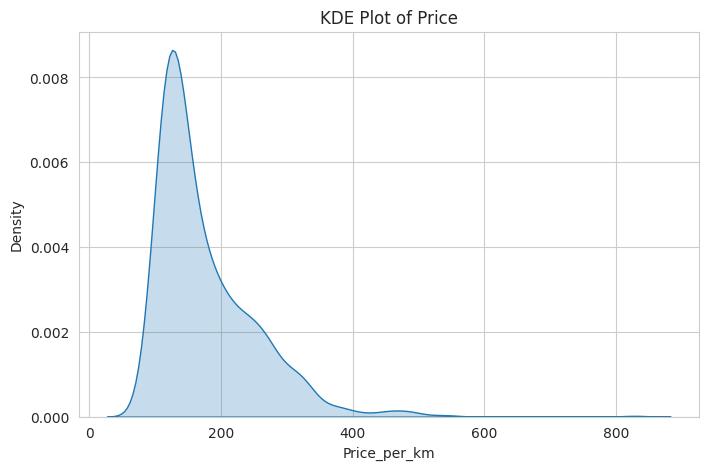

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df,
    x="price_per_km",
    fill=True,
    cmap="viridis"
)
plt.title("KDE Plot of Price")
plt.xlabel("Price_per_km")
plt.ylabel("Density")
plt.show()

/tmp/ipython-input-695934905.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


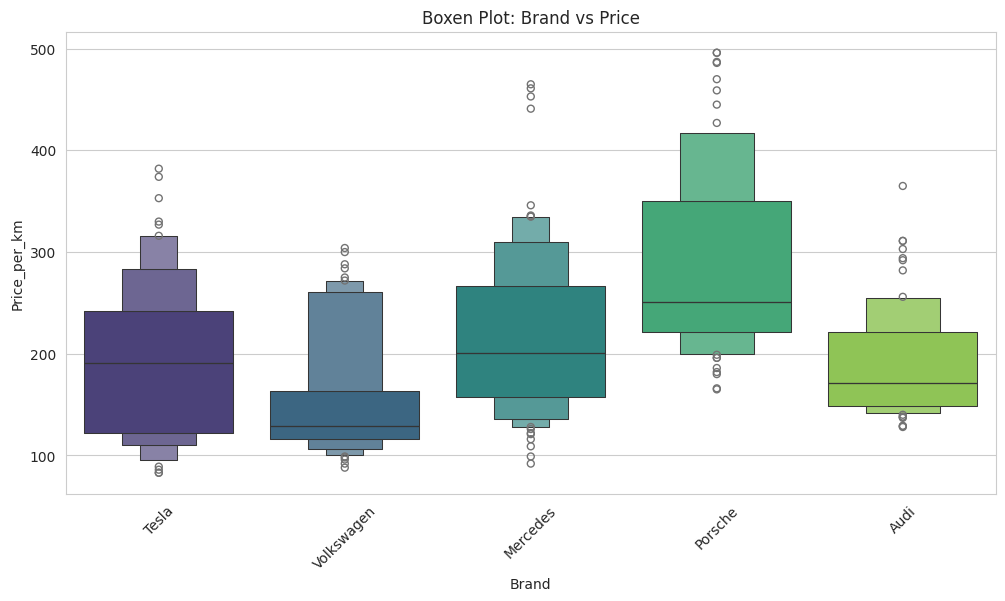

In [ ]:
top_brands = df['Brand'].value_counts().nlargest(5).index
df_filtered = df[df['Brand'].isin(top_brands)]
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.boxenplot(
    data=df_filtered,
    x="Brand",
    y="price_per_km",
    palette="viridis"
)

plt.xticks(rotation=45)
plt.title("Boxen Plot: Brand vs Price")
plt.xlabel("Brand")
plt.ylabel("Price_per_km")
plt.show()

/tmp/ipython-input-93365663.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


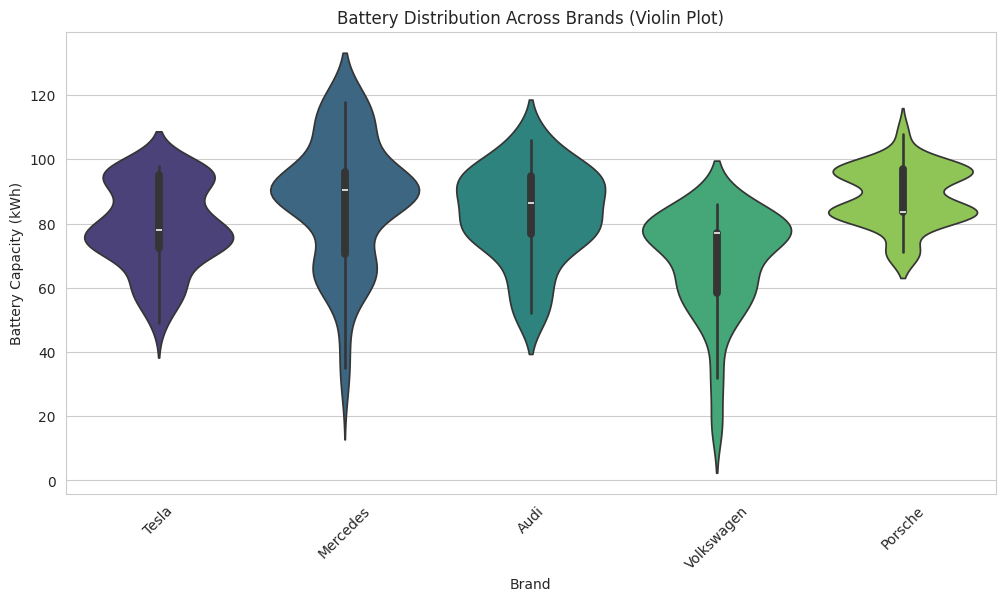

In [ ]:
top_brands = df['Brand'].value_counts().nlargest(5).index
df_filtered = df[df['Brand'].isin(top_brands)]
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.violinplot(
    data=df_filtered,
    x="Brand",
    y="Battery",
    palette="viridis"
)
plt.xticks(rotation=45)
plt.title("Battery Distribution Across Brands (Violin Plot)")
plt.xlabel("Brand")
plt.ylabel("Battery Capacity (kWh)")
plt.show()

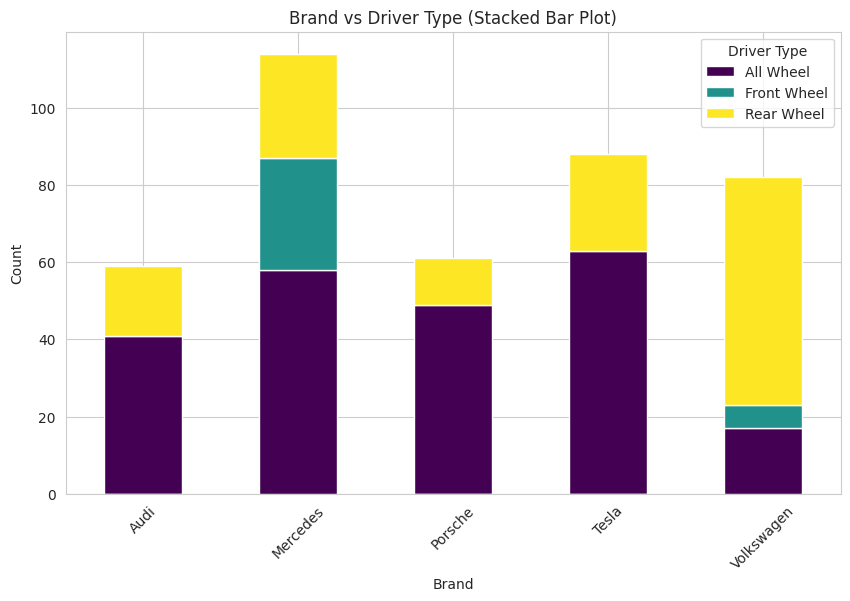

In [ ]:
top_brands = df['Brand'].value_counts().nlargest(5).index
df_filtered = df[df['Brand'].isin(top_brands)]
ct = pd.crosstab(df_filtered['Brand'], df_filtered['driver_type'])
ct.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    figsize=(10,6)
)
plt.title("Brand vs Driver Type (Stacked Bar Plot)")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Driver Type")
plt.show()

/tmp/ipython-input-2051816937.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating = df.groupby('Price_Group')['Rating'].mean().reset_index()
/tmp/ipython-input-2051816937.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


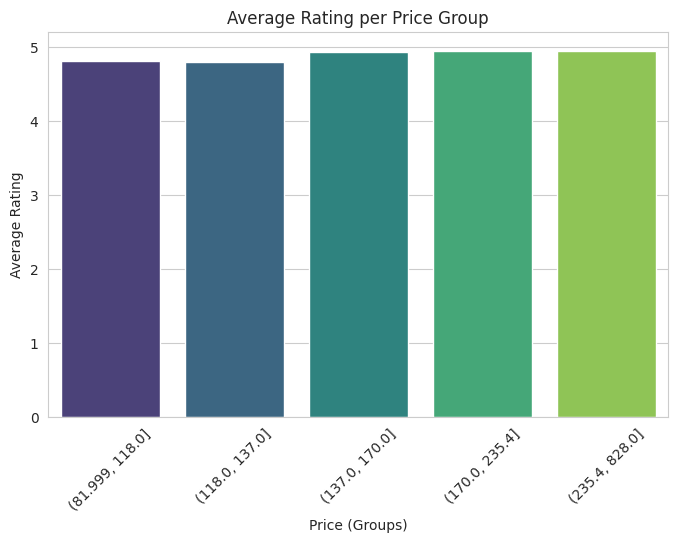

In [ ]:
df['Price_Group'] = pd.qcut(df['price_per_km'], 5)
avg_rating = df.groupby('Price_Group')['Rating'].mean().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.barplot(
    data=avg_rating,
    x='Price_Group',
    y='Rating',
    palette='viridis'
)
plt.xticks(rotation=45)
plt.title("Average Rating per Price Group")
plt.xlabel("Price (Groups)")
plt.ylabel("Average Rating")
plt.show()

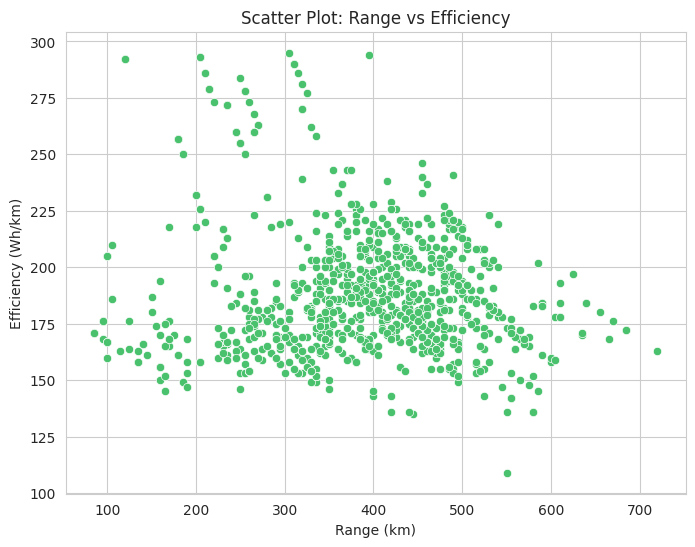

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Range",
    y="efficiency",
    color=sns.color_palette("viridis")[4]
)
plt.title("Scatter Plot: Range vs Efficiency")
plt.xlabel("Range (km)")
plt.ylabel("Efficiency (Wh/km)")
plt.show()

In [ ]:
numeric_cols = [
     'Range',
    'weight',
    'price_per_km'
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=numeric_cols)
sns.set_style("whitegrid")

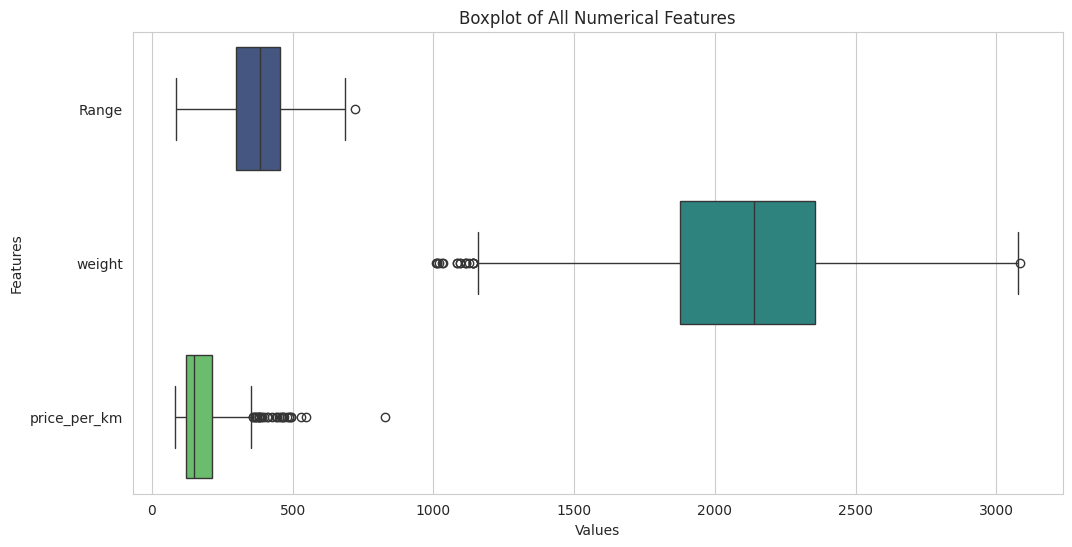

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df[numeric_cols],
    palette="viridis",
    orient="h"
)
plt.title("Boxplot of All Numerical Features")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

In [ ]:
top5 = df['Brand'].value_counts().nlargest(5).index
df_top5 = df[df['Brand'].isin(top5)]
df_top5['Battery_Cat'] = pd.qcut(
    df_top5['Battery'],
    3,
    labels=["Low", "Medium", "High"]
)

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

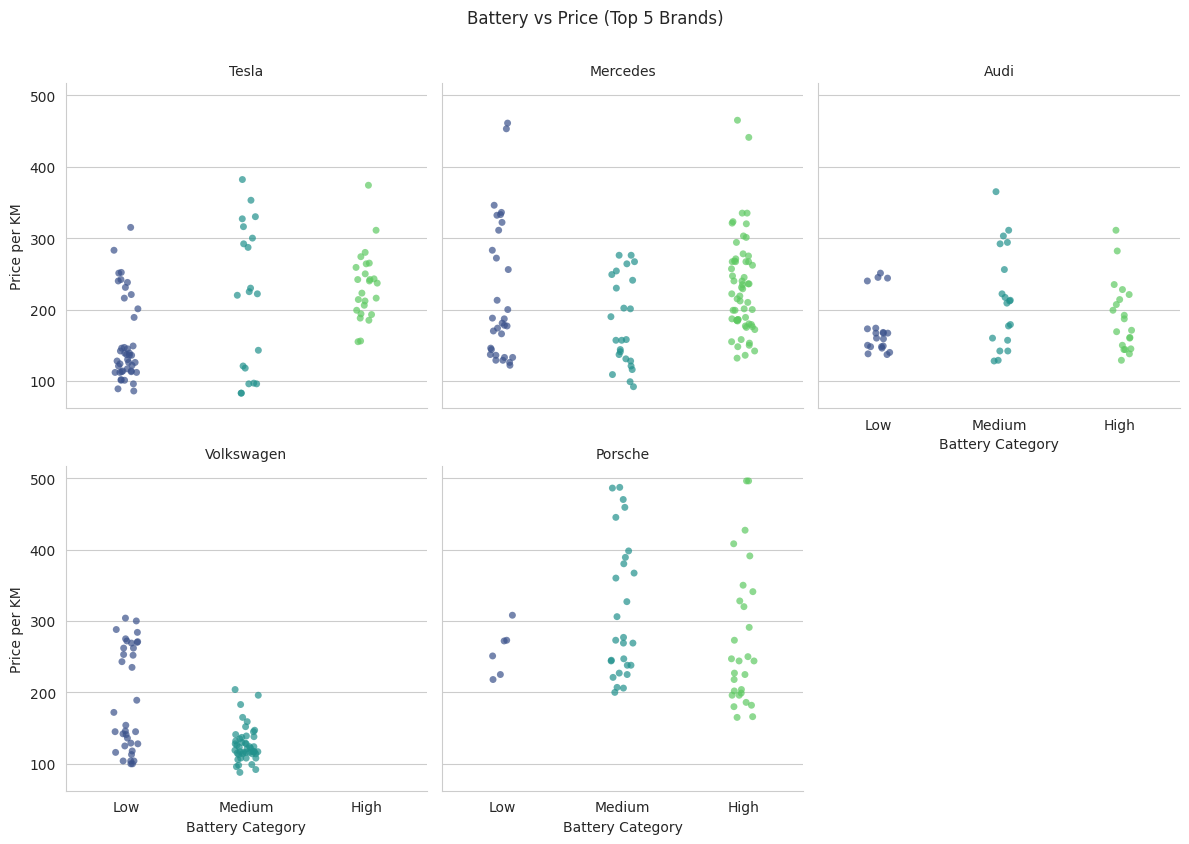

In [ ]:
sns.set_style("whitegrid")
g = sns.FacetGrid(
    df_top5,
    col="Brand",
    col_wrap=3,
    height=4
)
g.map_dataframe(
    sns.stripplot,
    x="Battery_Cat",
    y="price_per_km",
    palette="viridis",
    alpha=0.7,
    jitter=True
)
g.set_axis_labels("Battery Category", "Price per KM")
g.set_titles("{col_name}")
g.fig.suptitle("Battery vs Price (Top 5 Brands)", y=1.05)
plt.show()

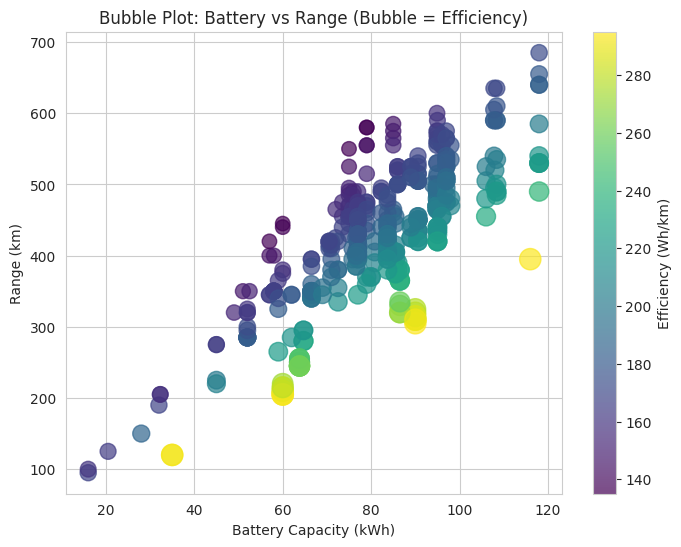

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['Battery'],
    df['Range'],
    s=df['efficiency'] * 0.8,
    c=df['efficiency'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label="Efficiency (Wh/km)")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.title("Bubble Plot: Battery vs Range (Bubble = Efficiency)")
plt.show()

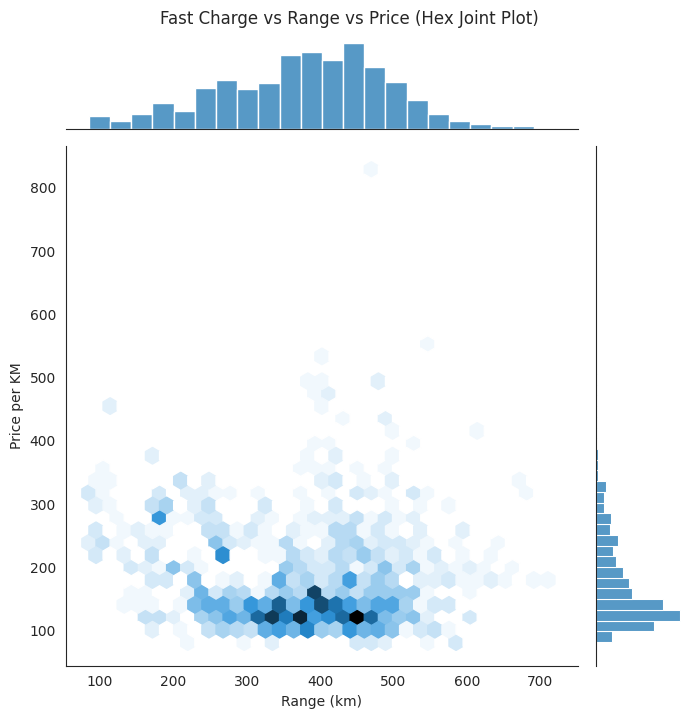

In [ ]:
sns.set_style("white")
g = sns.jointplot(
    data=df,
    x="Range",
    y="price_per_km",
    kind="hex",

    height=7
)
g.set_axis_labels("Range (km)", "Price per KM")
g.fig.suptitle("Fast Charge vs Range vs Price (Hex Joint Plot)", y=1.02)
plt.show()

In [ ]:
price_cols = ['german_price', 'uk_price', 'netherland_price']
for col in price_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['Brand'] + price_cols)
top5 = df['Brand'].value_counts().nlargest(5).index
df = df[df['Brand'].isin(top5)]
df_melted = df.melt(
    id_vars='Brand',
    value_vars=price_cols,
    var_name='Country',
    value_name='Price'
)


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


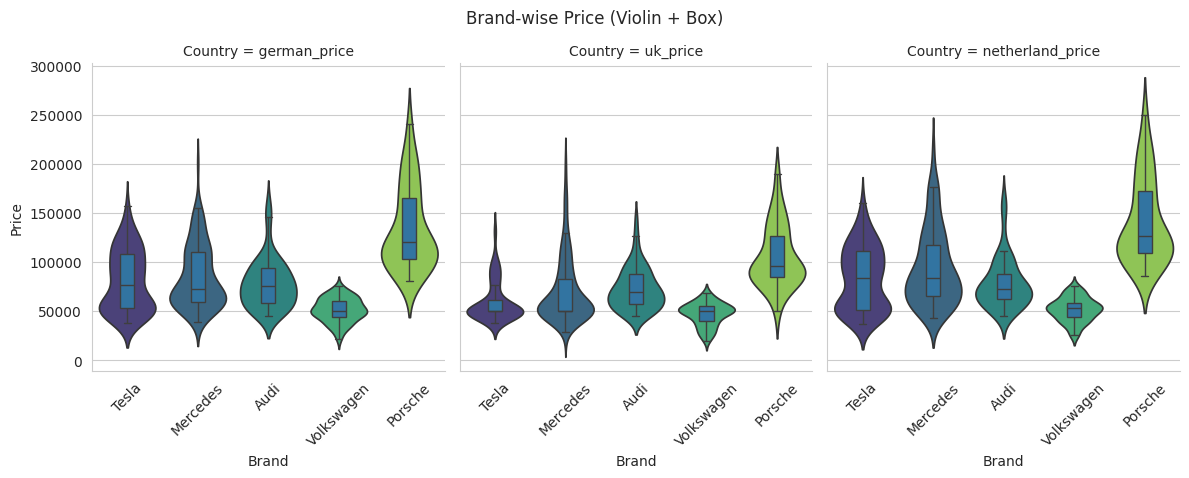

In [ ]:
g = sns.FacetGrid(
    df_melted,
    col="Country",
    col_wrap=3,
    height=4
)
g.map_dataframe(
    sns.violinplot,
    x="Brand",
    y="Price",
    palette="viridis",
    inner=None
)
g.map_dataframe(
    sns.boxplot,
    x="Brand",
    y="Price",
    width=0.2,
    boxprops={'zorder': 2},
    showcaps=True,
    showfliers=False,
    whiskerprops={'linewidth':1}
)
g.set_axis_labels("Brand", "Price")
g.fig.suptitle("Brand-wise Price (Violin + Box)", y=1.05)
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)
plt.show()

In [ ]:
numeric_cols = [
    'Battery',
    'Range',
    'efficiency',
    'price_per_km',
    'speed',
    'Rating'
]


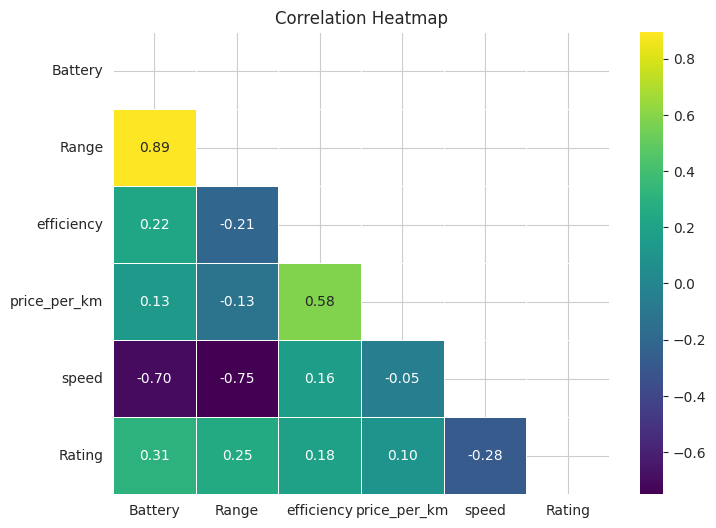

In [ ]:
corr = df[['Battery','Range','efficiency','price_per_km','speed','Rating']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='viridis',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()